# **Support Vector Machine (SVM)**

---

## **Introduction**
Support Vector Machine (SVM) is a supervised learning algorithm used for **classification and regression** tasks. It is particularly effective in high-dimensional spaces and works well when the number of dimensions exceeds the number of samples.

SVM aims to find the optimal **decision boundary** that maximizes the margin between different classes.

---

## **Methodology**

### **1. Problem Definition**
Given a dataset of $N$ samples where each sample $\mathbf{x}_j$ is a $d$-dimensional vector:

$$
\mathbf{x}_j = (x_{j1}, x_{j2}, \dots, x_{jd})
$$

Each sample belongs to one of two classes $y_j \in \{-1,1\}$. The goal of SVM is to find a hyperplane that best separates the two classes.

A **linear decision boundary** is given by:

$$
f(\mathbf{x}) = \mathbf{w}^T\mathbf{x} + b = 0
$$

where:
- $\mathbf{w}$ is the weight vector.
- $b$ is the bias term.

### **2. Maximum Margin Principle**
SVM finds the hyperplane that maximizes the **margin**, defined as the distance between the hyperplane and the closest data points (support vectors).

For correctly classified points:

$$
y_j (\mathbf{w}^T\mathbf{x}_j + b) \geq 1, \quad \forall j
$$

The margin is:

$$
\frac{2}{\|\mathbf{w}\|}
$$

To maximize the margin, we solve the following optimization problem:

$$
\min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2
$$

subject to:

$$
y_j (\mathbf{w}^T\mathbf{x}_j + b) \geq 1, \quad \forall j
$$

This is a **convex quadratic optimization** problem.

### **3. Soft-Margin SVM**
If data is not linearly separable, we introduce **slack variables** $\xi_j$ to allow misclassification:

$$
y_j (\mathbf{w}^T\mathbf{x}_j + b) \geq 1 - \xi_j, \quad \xi_j \geq 0
$$

The new objective function becomes:

$$
\min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{j=1}^{N} \xi_j
$$

where $C$ is a hyperparameter controlling the trade-off between maximizing the margin and minimizing classification errors.

### **4. Kernel Trick for Nonlinear SVM**
For nonlinear classification, we map data to a higher-dimensional space using a kernel function $K(\mathbf{x}_i, \mathbf{x}_j)$, such as:

- **Linear Kernel:**  
  $$
  K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i^T \mathbf{x}_j
  $$
- **Polynomial Kernel:**  
  $$
  K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i^T \mathbf{x}_j + 1)^p
  $$
- **Radial Basis Function (RBF) Kernel:**  

  $$
  K(\mathbf{x}_i, \mathbf{x}_j) = \exp\left(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2\right)
  $$

where $\gamma$ controls the influence of each training sample.

### **5. Decision Rule**
Once trained, predictions are made using:

$$
\hat{y} = \text{sign}(\mathbf{w}^T \mathbf{x} + b)
$$

For nonlinear SVMs using kernels:

$$
\hat{y} = \text{sign}\left( \sum_{j=1}^{N} \alpha_j y_j K(\mathbf{x}_j, \mathbf{x}) + b \right)
$$

where $\alpha_j$ are the Lagrange multipliers obtained during training.

---

## **Prerequisites**
- `numpy`
- `scikit-learn`
- `matplotlib`

---

The following is an example of using SVM to analyze EEG data recorded in a driving simulation experiment. The goal is to classify **steering angles** based on EEG signals.

You can try applying SVM to other BCI datasets.

## **main experiment**
- make binary/multiple label
- PCA reduction & explained varience ratio
- SVM classification

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from utils import (
    make_binary_label,
    make_multi_label,
    load_data_model,
)

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
# load train and test data
data_dir = "../data/data_model/sub-jimingda/forward1.npz"
data_list = load_data_model(data_dir)
train_data, train_label, test_data, test_label = data_list["feature_train"], data_list["steering_train"], data_list["feature_test"], data_list["steering_test"]

# simply flatten the data from (sample, channel, timepoint) to (sample, channel*timepoint)
train_data = np.reshape(train_data, (train_data.shape[0], -1))
test_data = np.reshape(test_data, (test_data.shape[0], -1))

# make binary labels
train_label_2 = make_binary_label(train_label)
test_label_2 = make_binary_label(test_label)

# make multi labels
split_list = [-1, -0.05, 0.05, 1]
train_label_3 = make_multi_label(train_label, split_list)
test_label_3 = make_multi_label(test_label, split_list)

# nomalization
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [3]:
# Need minutes to run
# Observe the change in cumulative variance of data.
cumulative_variance_ratio = []
for i in range(21):
    n_components = 1 + i * 100
    pca = PCA(n_components=n_components)
    pca.fit(train_data_scaled)
    cumulative_variance_ratio.append(np.sum(pca.explained_variance_ratio_))

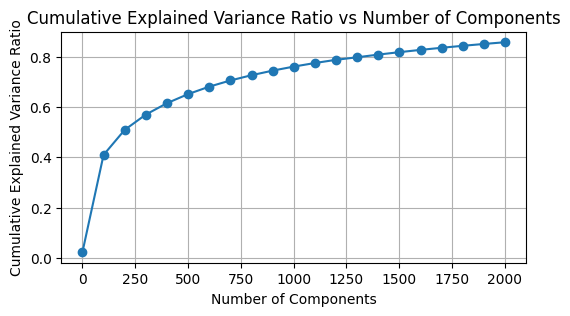

In [4]:
plt.figure(figsize=(6, 3))
x_label = [1 + i*100 for i in range(21)]
plt.plot(x_label, cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.show()

In [10]:
n_components = 2000
pca = PCA(n_components=n_components)
train_data_pca = pca.fit(train_data_scaled)
print("主成分的方差解释比例:", np.sum(pca.explained_variance_ratio_))

主成分的方差解释比例: 0.85792829839458


Result shows that 2000 components can expland 85% variance of data, but this dimension is still too high for classical SVM

To show the use of SVM, we forcibly reduce the dimension of the data, but this will lose most of the EEG information.

In [ ]:
train_data, train_label, test_data, test_label = data_list["feature_train"], data_list["steering_train"], data_list["feature_test"], data_list["steering_test"]

train_data_reduced = train_data[:, :, 100]
test_data_reduced = test_data[:, :, 100]

scaler = StandardScaler()
train_data_reduced = scaler.fit_transform(train_data_reduced)
test_data_reduced = scaler.transform(test_data_reduced)

pca = PCA(n_components=0.95)  # keep 95% variance
train_data_reduced = pca.fit_transform(train_data_reduced)
test_data_reduced = pca.transform(test_data_reduced)

In [19]:
# SVM model for binary label classification
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['poly', 'rbf'],
    'gamma': ['scale', 'auto']
}
model = SVC(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_data_reduced, train_label_2)

best_model = grid_search.best_estimator_

pred_2 = best_model.predict(test_data_reduced)

accuracy_2 = accuracy_score(test_label_2, pred_2)
print(f"Accuracy: {accuracy_2 * 100:.2f}%")
print("Best parameters:", grid_search.best_params_)

Accuracy: 46.44%
Best parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}


In [21]:
# SVM model for multi label classification
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['poly', 'rbf'],
    'gamma': ['scale', 'auto']
}
model = SVC(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_data_reduced, train_label_3)

best_model = grid_search.best_estimator_

pred_3 = best_model.predict(test_data_reduced)

accuracy_2 = accuracy_score(test_label_3, pred_3)
print(f"Accuracy: {accuracy_2 * 100:.2f}%")
print("Best parameters:", grid_search.best_params_)

Accuracy: 69.90%
Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
